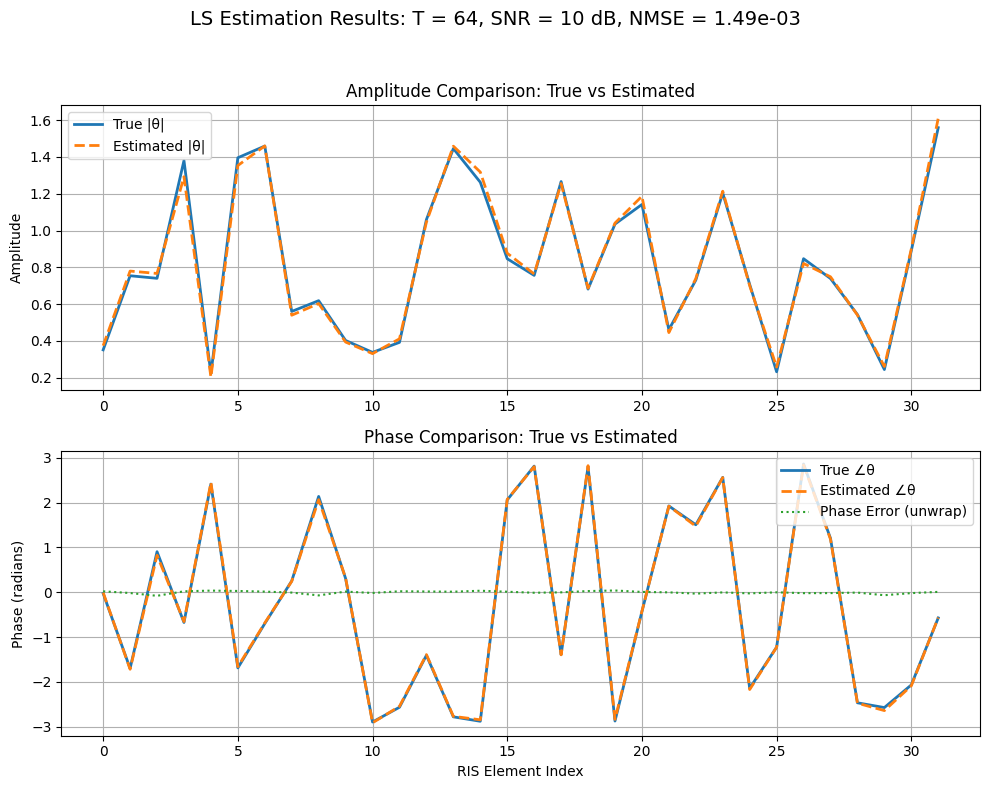

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: System Parameters
# ----------------------------
M = 4                # Number of BS antennas
N = 32               # Number of RIS elements
SNR_dB = 10          # Low SNR for more estimation error
T = 2 * N            # Number of pilot time slots (reduced for worse estimation)
sigma2 = 1 / (10**(SNR_dB / 10))  # Noise variance derived from SNR

# ----------------------------
# Step 2: True Channel Generation
# ----------------------------
np.random.seed(42)
theta_true = (np.random.randn(N, 1) + 1j * np.random.randn(N, 1)) / np.sqrt(2)

# ----------------------------
# Step 3: Generate Pilot & RIS Phases
# ----------------------------
X = (np.random.randn(M, T) + 1j * np.random.randn(M, T)) / np.sqrt(2)    # M x T pilots
Phi = np.exp(1j * 2 * np.pi * np.random.rand(N, T))                      # N x T RIS phases
H1 = (np.random.randn(N, M) + 1j * np.random.randn(N, M)) / np.sqrt(2)   # N x M BS-to-RIS channel

y = np.zeros((T, 1), dtype=complex)
A = np.zeros((T, N), dtype=complex)

for t in range(T):
    x_t = X[:, t].reshape(M, 1)
    phi_t = Phi[:, t].reshape(N, 1)
    Hx = H1 @ x_t                     # signal at RIS
    a_t = (phi_t.flatten() * Hx.flatten()).T
    A[t, :] = a_t

    # Add complex Gaussian noise
    noise = np.sqrt(sigma2 / 2) * (np.random.randn() + 1j * np.random.randn())
    y[t] = A[t, :] @ theta_true + noise

# ----------------------------
# Step 4: Least Squares Estimation
# ----------------------------
theta_est = np.linalg.pinv(A) @ y

# ----------------------------
# Step 5: Compute NMSE
# ----------------------------
nmse = np.linalg.norm(theta_est - theta_true)**2 / np.linalg.norm(theta_true)**2

# ----------------------------
# Step 6: Visualization
# ----------------------------
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 6.1 Amplitude
axs[0].plot(np.abs(theta_true), label="True |θ|", linewidth=2)
axs[0].plot(np.abs(theta_est), '--', label="Estimated |θ|", linewidth=2)
axs[0].set_title("Amplitude Comparison: True vs Estimated")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)
axs[0].legend()

# 6.2 Phase
true_phase = np.angle(theta_true)
est_phase = np.angle(theta_est)
phase_error = np.unwrap(est_phase - true_phase)

axs[1].plot(true_phase, label="True ∠θ", linewidth=2)
axs[1].plot(est_phase, '--', label="Estimated ∠θ", linewidth=2)
axs[1].plot(phase_error, ':', label="Phase Error (unwrap)", linewidth=1.5)
axs[1].set_title("Phase Comparison: True vs Estimated")
axs[1].set_xlabel("RIS Element Index")
axs[1].set_ylabel("Phase (radians)")
axs[1].grid(True)
axs[1].legend()

plt.suptitle(f"LS Estimation Results: T = {T}, SNR = {SNR_dB} dB, NMSE = {nmse:.2e}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
